# Basic Classification: MNIST

This example uses tensorflow and Keras (an abstraction on top of tensorflow) to create a very basic classification model to predict numbes based on images.


## Initialize Modules

The main modules to load are `tensorflow` and `keras`.

Also load helpers such as `numpy` and `matplotlib`.

In [23]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

# Print current vesion of tensorflow installed in current environment
print(tf.__version__)

# Enable matplotlib for inline jupyter notebook
%matplotlib inline

# Enable plots
print_graphs = True

1.12.0


## Load DataSets

For every machine learning problem we need to compile three different data sets:
- *traininig-set*
- *test-set*
- *validation-set*

In this example we load **minst** dataset for *number classification*. 

In [24]:
import tensorflow.keras.datasets.mnist as mnist

# Load mnist dataset using keras tensorflow module
# https://www.tensorflow.org/api_docs/python/tf/keras/datasets/mnist/load_data
# tf.keras.datasets.mnist.load_data(path='mnist.npz')
#    path: if path is not specified, the mnist dataset will be loaded automatically into a temp folder
# Returns Tuple of Numpy arrays: `(x_train, y_train), (x_test, y_test)`.
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# let's print the shape before we reshape and normalize
print("x_train shape", x_train.shape)
print("y_train shape", y_train.shape)
print("x_test shape", x_test.shape)
print("y_test shape", y_test.shape)

x_train shape (60000, 28, 28)
y_train shape (60000,)
x_test shape (10000, 28, 28)
y_test shape (10000,)


In [25]:
# Print output for the first image (bytes)
print(x_train[0])
# Printthe label for the first image
print(y_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

Plot the images and the labels (set `print_graphs = True`)

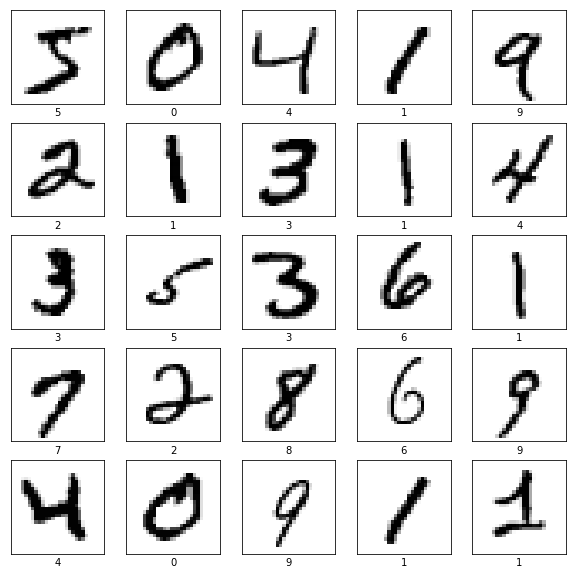

In [26]:
# plot 4 images as gray scale
if print_graphs :
    # plt.subplot(pos)
    # pos is a three digit integer, where the first digit is the number of rows, 
    # the second the number of columns, and the third the index of the subplot. 
    # i.e. fig.add_subplot(235) is the same as fig.add_subplot(2, 3, 5).
    # NOTE: that all integers must be less than 10 for this form to work.
    plt.figure(figsize=(10,10))
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(x_train[i], cmap=plt.cm.binary)
        plt.xlabel(y_train[i])
    # show the plot
    plt.show()

## Data Normalization

Datasets must be **normalized** (and **cleaned up**). In this case, image values (grayscale) are normalized to a minumun (0) and a maximun (1).

Sometimes is recommended to crop or discard some values, in order to avoid **outliers** and increase **accuracy** of the model. In statistics, an outlier is an observation point that is distant from other observations.

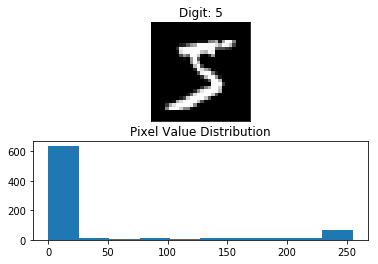

In [27]:
# Plot the graph to see the distribution (0,255) 
if print_graphs :
    fig = plt.figure()
    plt.subplot(2,1,1)
    plt.imshow(x_train[0], cmap='gray', interpolation='none')
    plt.title("Digit: {}".format(y_train[0]))
    plt.xticks([])
    plt.yticks([])
    plt.subplot(2,1,2)
    plt.hist(x_train[0].reshape(784))
    plt.title("Pixel Value Distribution")

In [28]:
# Normalize the values by dividing the values by 255.0 (float32)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

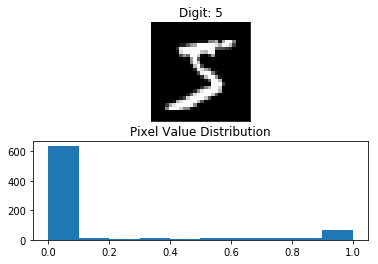

In [29]:
# Print again the image to see the normalized distribution (0, 1)
if print_graphs :
    fig = plt.figure()
    plt.subplot(2,1,1)
    plt.imshow(x_train[0], cmap='gray', interpolation='none')
    plt.title("Digit: {}".format(y_train[0]))
    plt.xticks([])
    plt.yticks([])
    plt.subplot(2,1,2)
    plt.hist(x_train[0].reshape(784))
    plt.title("Pixel Value Distribution")

## Data Preparation

In order to train our neural network to classify images (DNN), we first have to unroll the height×width pixel format into one big vector - the input vector. So its length must be 28x28=784.

In [30]:
# let's print the shape before we reshape and normalize
print("x_train shape", x_train.shape)
print("y_train shape", y_train.shape)
print("x_test shape", x_test.shape)
print("y_test shape", y_test.shape)

x_train shape (60000, 28, 28)
y_train shape (60000,)
x_test shape (10000, 28, 28)
y_test shape (10000,)


For the reshape, aslo we need the number or images for each dataset.

In [31]:
# building the input vector from the 28x28 pixels
x_train_reshape = x_train.reshape(60000, 784)
x_test_reshape = x_test.reshape(10000, 784)

# print the final input shape ready for training
print("train matrix shape", x_train_reshape.shape)
print("Test matrix shape", x_test_reshape.shape)

train matrix shape (60000, 784)
Test matrix shape (10000, 784)


Since we are going to use a `Flatten` layer for the first input into the DNN, it is not necessary to reshape the **inputs** or prepare the data.

## Building Model

Next step is to build the DNN model.

The model is composed of two hidden 128-node layers, with enough model complexity for recognizing digits. For the multi-class classification we add another densely-connected (or fully-connected) layer for the 10 different output classes. 

For this network architecture, we are going to use the Keras `Sequential` Model. We can stack layers using the .add() method.

When adding the first layer in the Sequential Model we need to specify the input shape so Keras can create the appropriate matrices. For all remaining layers the shape is inferred automatically. 

In order to introduce nonlinearities into the network and elevate it beyond the capabilities of a simple perceptron we also add activation functions to the hidden layers. The differentiation for the training via backpropagation is happening behind the scenes without having to implement the details. 

We also add `dropout` as a way to prevent **overfitting**. Here we randomly keep some network weights fixed when we would normally update them so that the network doesn't rely too much on very few nodes.

The last layer consists of connections for our 10 classes (1,10) and the `softmax` activation which is standard for multi-classification targets. 

In [33]:
# building a linear stack of layers with the sequential model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

The first layer in this network, `tf.keras.layers.Flatten`, transforms the format of the images from a 2d-array (of 28 by 28 pixels), to a 1d-array of 28 * 28 = 784 pixels. Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.

After the pixels are flattened, the network consists of a sequence of two `tf.keras.layers.Dense` layer and two `tf.keras.layers.Dropout` inbetween. These are densely-connected, or fully-connected, neural layers. The first Dense layer has 128 nodes (or neurons). The second (and last) layer is a 10-node softmax layer—this returns an array of 10 probability scores that sum to 1. Each node contains a score that indicates the probability that the current image belongs to one of the 10 classes.

## Compile the model

Before the model is ready for training, it needs a few more settings. These are added during the model's compile step:

- **Loss function**: This measures how accurate the model is during training. We want to minimize this function to "steer" the model in the right direction.
- **Optimizer**: This is how the model is updated based on the data it sees and its loss function.
- **Metrics**: Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.


In [34]:
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Train the model

Training the neural network model requires the following steps:

- Feed the training data to the model—in this example, the train_images and train_labels arrays.
- The model learns to associate images and labels.
- We ask the model to make predictions about a test set—in this example, the test_images array. We verify that the predictions match the labels from the test_labels array.

To start training, call the model.fit method—the model is "fit" to the training data:

In [35]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 3s 50us/step - loss: 0.3015 - acc: 0.9087
Epoch 2/5
60000/60000 [==============================] - 3s 48us/step - loss: 0.1453 - acc: 0.9556
Epoch 3/5
60000/60000 [==============================] - 3s 45us/step - loss: 0.1110 - acc: 0.9658
Epoch 4/5
60000/60000 [==============================] - 3s 44us/step - loss: 0.0961 - acc: 0.9698
Epoch 5/5
60000/60000 [==============================] - 3s 46us/step - loss: 0.0848 - acc: 0.9732


## Evaluate accuracy

Next, compare how the model performs on the test dataset:

In [36]:
test_loss, test_acc = model.evaluate(x_test, y_test)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 31us/step
Test accuracy: 0.9784


## Make predictions

With the model trained, we can use it to make predictions about some images.

In [38]:
predictions = model.predict(x_test)

predictions[0]

A prediction is an array of 10 numbers. These describe the "confidence" of the model that the image corresponds to each of the 10 different articles of clothing. We can see which label has the highest confidence value:

In [40]:
np.argmax(predictions[0])

7

So the model is most confident that this image is an ankle boot, or class_names[9]. And we can check the test label to see this is correct:

In [43]:
y_test[0]

7

In [51]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


Let's look at the 0th image, predictions, and prediction array. 

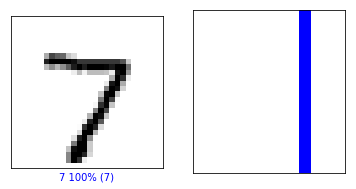

In [52]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  y_test)


Let's plot several images with their predictions. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percent (out of 100) for the predicted label. Note that it can be wrong even when very confident. 

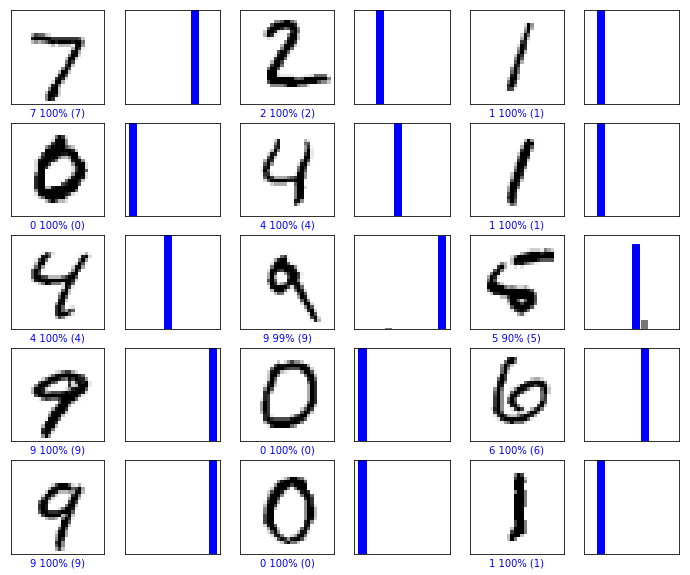

In [54]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, y_test)


Finally, use the trained model to make a prediction about a single image. 

In [59]:
# Grab an image from the test dataset
img = x_test[0]

print(img.shape)

# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

predictions_single = model.predict(img)

print(predictions_single)

# Get the best result
np.argmax(predictions_single[0])


(28, 28)
(1, 28, 28)
[[3.4355015e-08 3.8278651e-07 5.9948393e-06 8.2979495e-06 3.2309547e-10
  5.8917188e-08 2.3331104e-11 9.9997890e-01 2.9478926e-08 6.1305100e-06]]


7